<a href="https://colab.research.google.com/github/ViFLara/Statistics-and-Machine-Learning/blob/master/Aula2_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")

In [6]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
df = pd.concat([df1,df2,df3,df4,df5])

In [8]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [9]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [10]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
127,Salvador,2019-03-02,240.61,1035,3
90,Natal,2019-01-02,100.54,1036,2
19,Natal,2019-03-31,282.00,854,2
137,Salvador,2019-03-02,51.66,1036,3
14,Fortaleza,2019-01-12,132.68,1005,1


In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [12]:
df['LojaID'] = df['LojaID'].astype("object")

In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [14]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


# Handling missing values

In [15]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
# Replacing null values with the mean
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [17]:
df['Vendas'].mean()

122.61180089485438

In [18]:
# Replacing null values with zero
df['Vendas'].fillna(0, inplace=True)

In [19]:
# Erasing lines with null values
df.dropna(inplace=True)

In [20]:
df.dropna(subset=['Vendas'], inplace=True)

In [21]:
# Removing rows with missing values in all columns
df.dropna(how="all", inplace=True)

# Creating new columns

In [22]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [24]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [25]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [26]:
df['Receita'].max()

3544.0

In [27]:
df['Receita'].min()

3.34

In [28]:
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [29]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [30]:
df.groupby("Cidade")['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [31]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Working with dates

In [32]:
df['Data'] = df['Data'].astype("int64")

In [33]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [34]:
df['Data'] = pd.to_datetime(df['Data'])

In [35]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [36]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [37]:
df['Ano_Venda'] = df['Data'].dt.year

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
172,Natal,2019-01-02,6.70,1035,1,6.70,1.0,2019
126,Recife,2019-03-02,41.87,980,8,334.96,8.0,2019
44,Recife,2019-01-01,142.21,983,8,1137.68,8.0,2019
92,Fortaleza,2019-01-01,3.49,1005,4,13.96,4.0,2019
53,Salvador,2019-01-01,39.50,1035,3,118.50,3.0,2019


In [39]:
df['Mes_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
37,Salvador,2019-01-01,18.31,1036,3,54.93,3.0,2019,1,1
21,Aracaju,2018-01-01,37.36,1520,2,74.72,2.0,2018,1,1
15,Salvador,2019-01-01,20.15,1036,3,60.45,3.0,2019,1,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2
112,Aracaju,2018-01-01,4.52,1522,8,36.16,8.0,2018,1,1


In [41]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [42]:
df['Diferenca_Dias'] = df['Data'] - df['Data'].min()

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
47,Natal,2018-03-13,521.00,854,3,1563.00,3.0,2018,3,13,71 days
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days
73,Salvador,2019-01-01,8.39,1037,1,8.39,1.0,2019,1,1,365 days
49,Aracaju,2018-01-01,53.74,1522,3,161.22,3.0,2018,1,1,0 days
127,Recife,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2,425 days


In [44]:
df['Trimestre_Venda'] = df['Data'].dt.quarter

In [45]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
178,Natal,2019-01-02,39.28,1037,3,117.84,3.0,2019,1,2,366 days,1
7,Recife,2019-02-11,33.37,982,3,100.11,3.0,2019,2,11,406 days,1
72,Aracaju,2018-01-01,168.95,1523,7,1182.65,7.0,2018,1,1,0 days,1
183,Salvador,2019-01-02,120.23,1037,2,240.46,2.0,2019,1,2,366 days,1
235,Natal,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3,367 days,1


In [46]:
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [47]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Data visualization

In [48]:
df['LojaID'].value_counts(ascending=False) # quantas vendas tem para cada LojaID

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

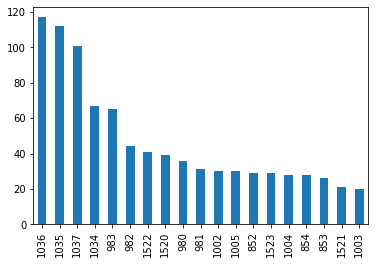

In [49]:
df['LojaID'].value_counts(ascending=False).plot.bar();

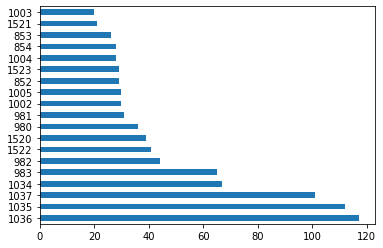

In [50]:
df['LojaID'].value_counts().plot.barh();

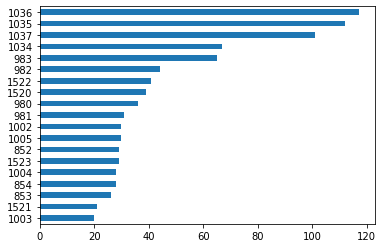

In [51]:
df['LojaID'].value_counts(ascending=True).plot.barh();

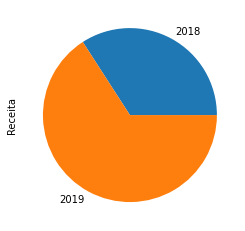

In [52]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [53]:
df['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

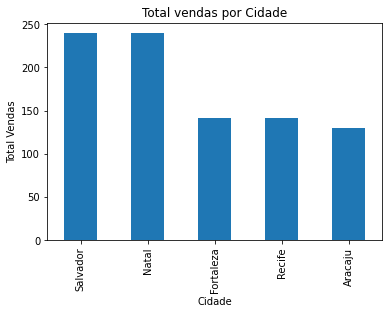

In [54]:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

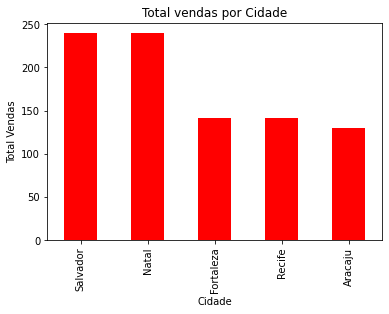

In [55]:
df['Cidade'].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [56]:
plt.style.use("ggplot")

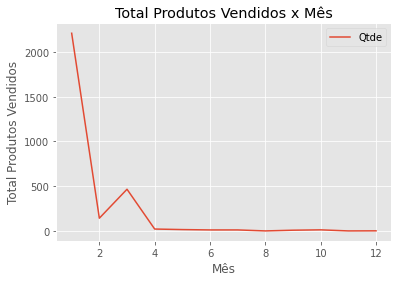

In [57]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title= "Total Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [58]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [60]:
# selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

In [63]:
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

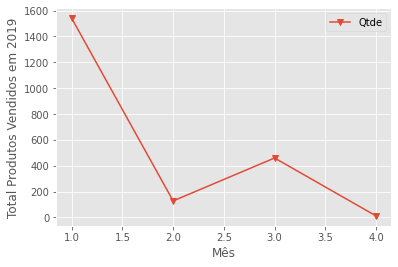

In [62]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos em 2019");
plt.legend();

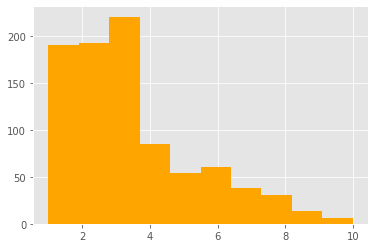

In [66]:
# histograma
plt.hist(df['Qtde'], color="orange");

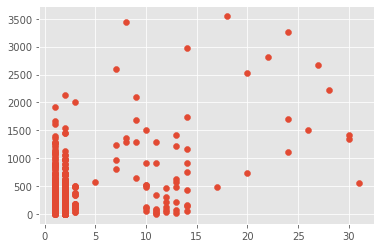

In [67]:
plt.scatter(x=df_2019['Dia_Venda'], y = df_2019['Receita']);

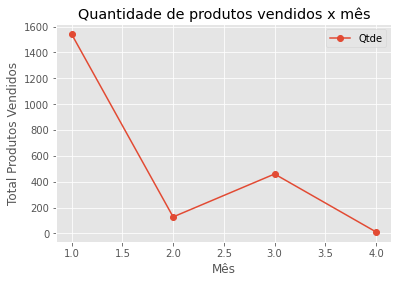

In [68]:
# salvando em png
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")